In [95]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
from hist.stack import Stack

sys.path.append("..")
from HistogramLib.store import HistogramStore
from HistogramLib.plot_manager import PlotManager
from HistogramLib.bokeh.histogram_widget import *
from hists.parameters import beamEnergies, synchrotronBeamEnergiesMap
from hists.store import HistogramId
from bokeh_apps.widgets import *

In [96]:
hist_folder = '/grid_mnt/data_cms_upgrade/cuisset/testbeam18/clue3d/v41'
histStore = HistogramStore(hist_folder, HistogramId)

In [97]:
colors_cycle = ["tab:blue", "tab:orange", "tab:green"]

In [98]:
def getClue3DProjected(datatype, beamEnergy):
    return (
        histStore.get(HistogramId("Clus3DClusteredEnergy", "cmssw", datatype))
        .getHistogram(HistogramKind.COUNT)
        [{"beamEnergy":hist.loc(beamEnergy), "mainOrAllTracksters":hist.loc("mainTrackster")}]
        .project("clus3D_energy")
    )
def getClue2DProjected(datatype, beamEnergy):
    return (
        histStore.get(HistogramId("EnergyClustered2DPerEvent", "cmssw", datatype))
        .getHistogram(HistogramKind.COUNT)
        [{"beamEnergy":hist.loc(beamEnergy)}]
        .project("clus2D_energy_sum")
    )
def getRechitsProjected(datatype, beamEnergy):
    return (
        histStore.get(HistogramId("RechitsTotalEnergyPerEvent", "cmssw", datatype))
        .getHistogram(HistogramKind.COUNT)
        [{"beamEnergy":hist.loc(beamEnergy)}]
        .project("rechits_energy_sum")
    )

In [99]:
histStore.get(HistogramId("RechitsTotalEnergyPerEvent", "cmssw", "data")).getHistogram(HistogramKind.COUNT)

Hist(
  IntCategory([20, 30, 50, 80, 100, 120, 150, 200, 250, 300], name='beamEnergy', label='Beam energy (GeV)'),
  Regular(2000, 0, 350, name='rechits_energy_sum', label='Total reconstructed energy per event (GeV)'),
  storage=Double()) # Sum: 272852.0 (272855.0 with flow)

In [128]:
def plot(datatype, beamEnergy, xLim=None, rebin=None, xlabel="Reconstructed energy (GeV)", mainTrackster=None):
    plt.figure()
    if xLim is None:
        xLim = synchrotronBeamEnergiesMap[beamEnergy] - 40, synchrotronBeamEnergiesMap[beamEnergy]+10
    plt.xlim(xLim)
    hists = [getRechitsProjected(datatype, beamEnergy), getClue2DProjected(datatype, beamEnergy), getClue3DProjected(datatype, beamEnergy)]
    if rebin is not None:
        for i in range(len(hists)):
            hists[i] = hists[i][::hist.tag.rebin(rebin)]
    hep.histplot(hists, 
        yerr=False, label=["Rechits", "CLUE", "CLUE3D\n(main trackster)" if mainTrackster else "CLUE3D"], #["Energy reconstructed", "Energy clustered by CLUE", "Energy clustered by CLUE3D"]
        color=colors_cycle, flow="none"
        )
    if xlabel:
        plt.xlabel(xlabel)
    plt.ylabel("Event count")
    if datatype == "data":
        hep.cms.text("Preliminary")
    else:
        hep.cms.text("Preliminary Simulation")
    hep.cms.lumitext("$e^+$ TB - "+ str(beamEnergy) + " GeV")
    plt.legend(loc='upper left')

def plotDataSim(h_data:hist.Hist, h_sim:hist.Hist, label_sim:str, beamEnergy, xLim=None, rebin=None, xlabel=None):
    plt.figure()
    if xLim is None:
        xLim = synchrotronBeamEnergiesMap[beamEnergy]*0.8, synchrotronBeamEnergiesMap[beamEnergy]*1.1
    plt.xlim(xLim)
    if rebin is not None:
        h_data = h_data[::hist.rebin(rebin)]
        h_sim = h_sim[::hist.rebin(rebin)]
    h_sim = h_sim * h_data.sum() / h_sim.sum() # norm sim to data
    handle_sim, = hep.histplot(h_sim, yerr=False, label=label_sim, histtype="step", flow="none")
    handle_data, = hep.histplot(h_data, yerr=True, label="Data", histtype="errorbar", color="black", flow="none")
    if xlabel:
        plt.xlabel(xlabel)
    plt.ylabel("Event count")
    hep.cms.text("Preliminary")
    hep.cms.lumitext("$e^+$ TB - "+ str(beamEnergy) + " GeV")
    plt.legend(loc='upper left', handles=[handle_data[0], handle_sim[0]])

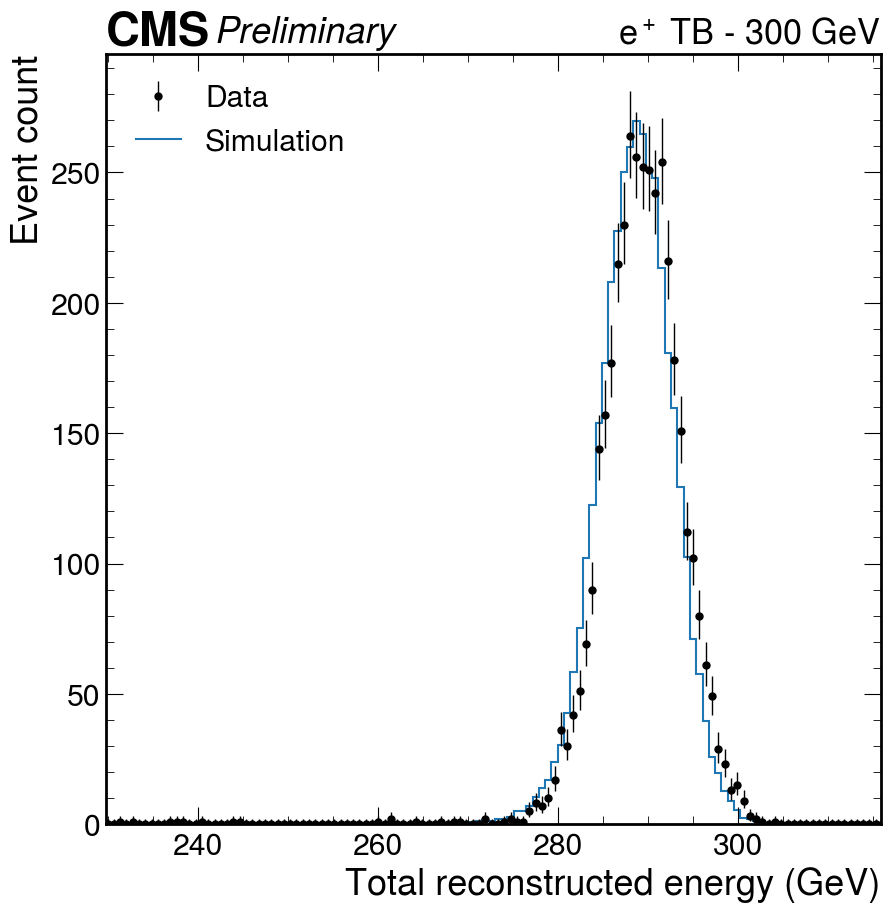

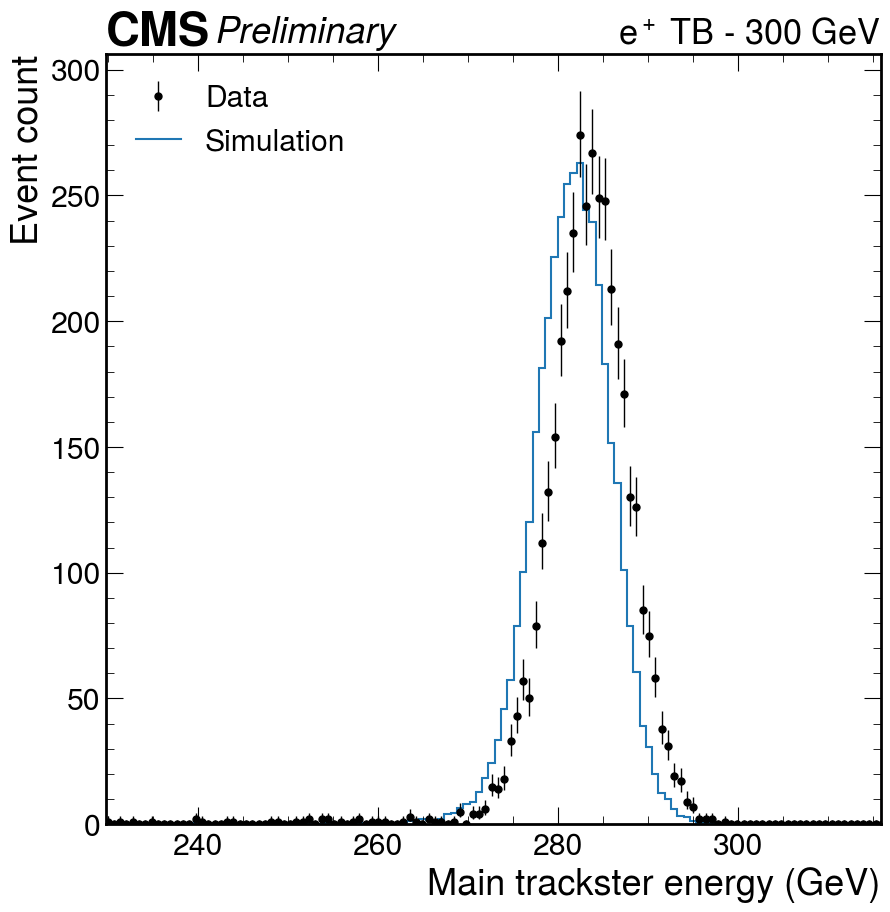

In [121]:
beamEnergy = 300
if beamEnergy < 100:
    rebin = 2
elif beamEnergy < 300:
    rebin = 3
else:
    rebin = 4
plotDataSim(getRechitsProjected("data", beamEnergy),getRechitsProjected("sim_proton_v46_patchMIP", beamEnergy),
            label_sim="Simulation", beamEnergy=beamEnergy, rebin=rebin, xlabel="Total reconstructed energy (GeV)")
plotDataSim(getClue3DProjected("data", beamEnergy),getClue3DProjected("sim_proton_v46_patchMIP", beamEnergy),
            label_sim="Simulation", beamEnergy=beamEnergy, rebin=rebin, xlabel="Main trackster energy (GeV)")
# plt.savefig("energy-distribution-rechits.pdf", bbox_inches="tight")

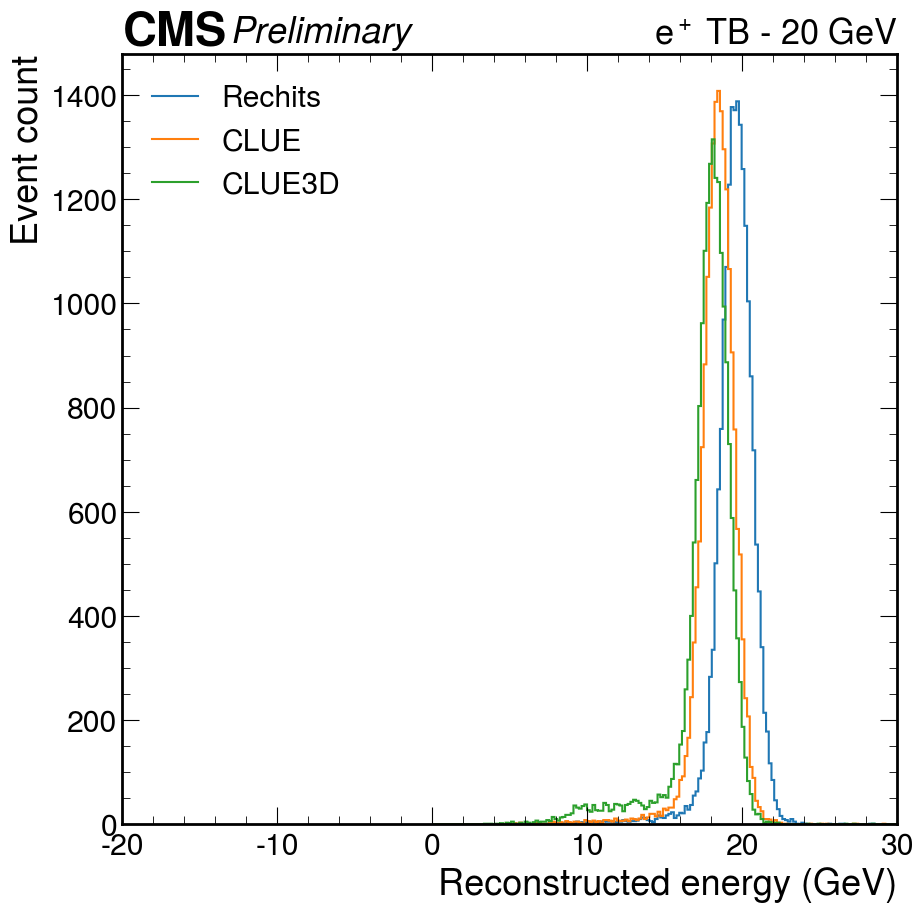

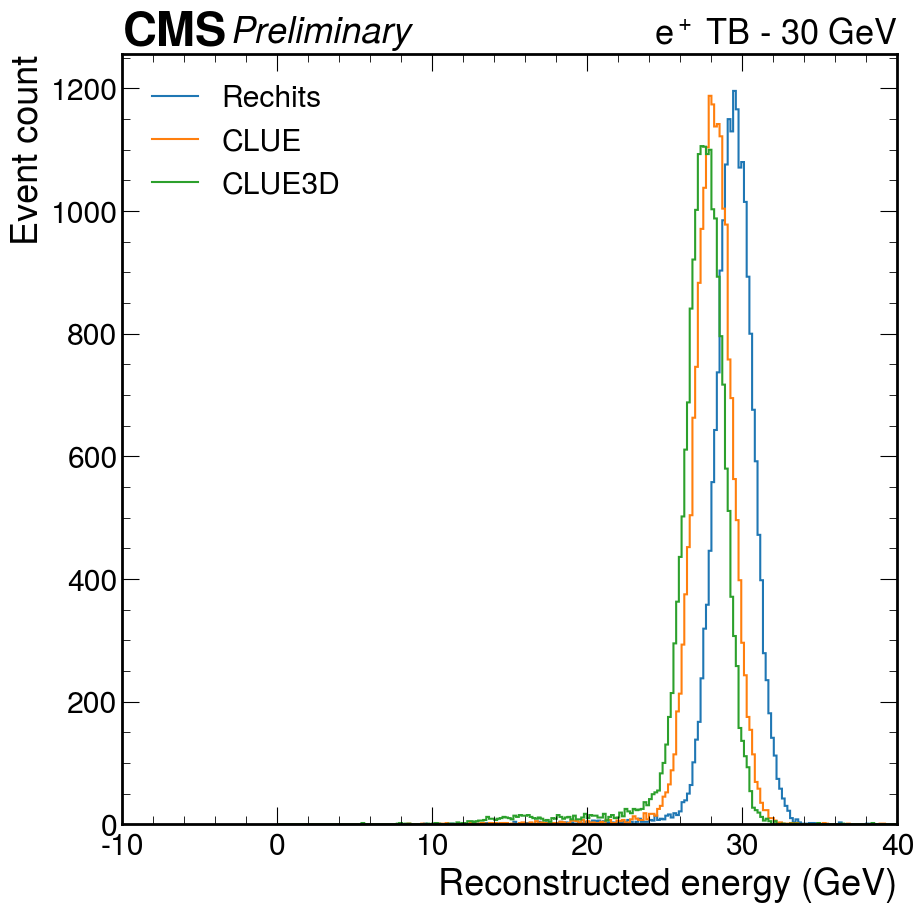

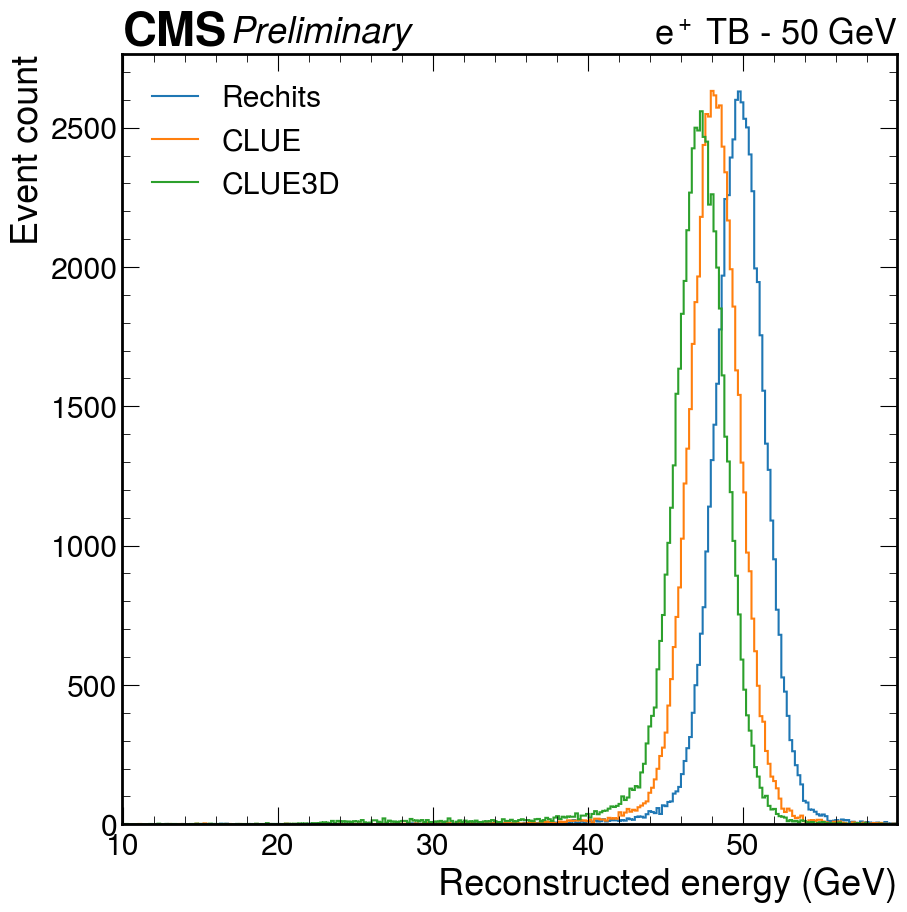

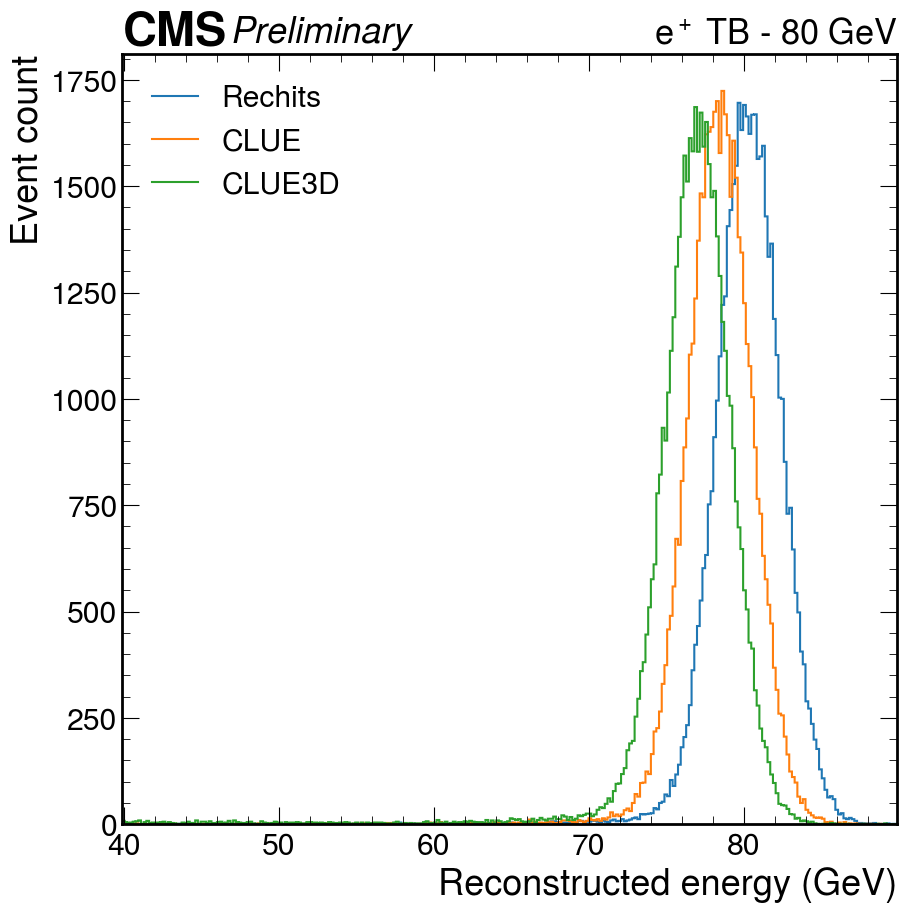

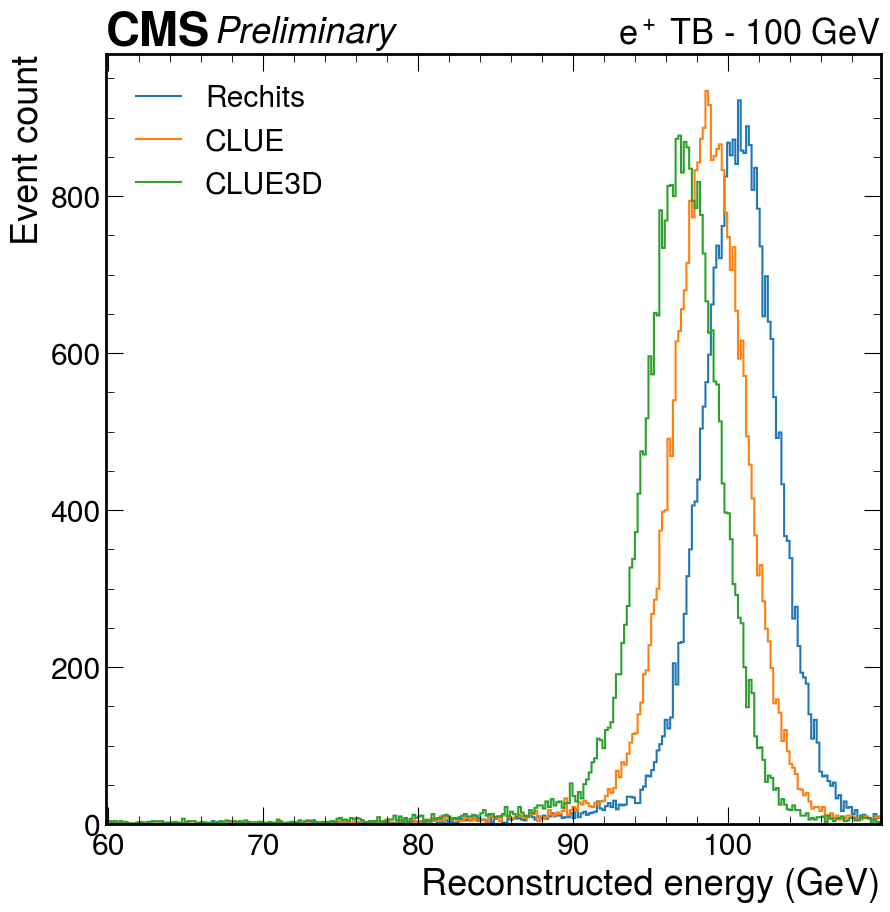

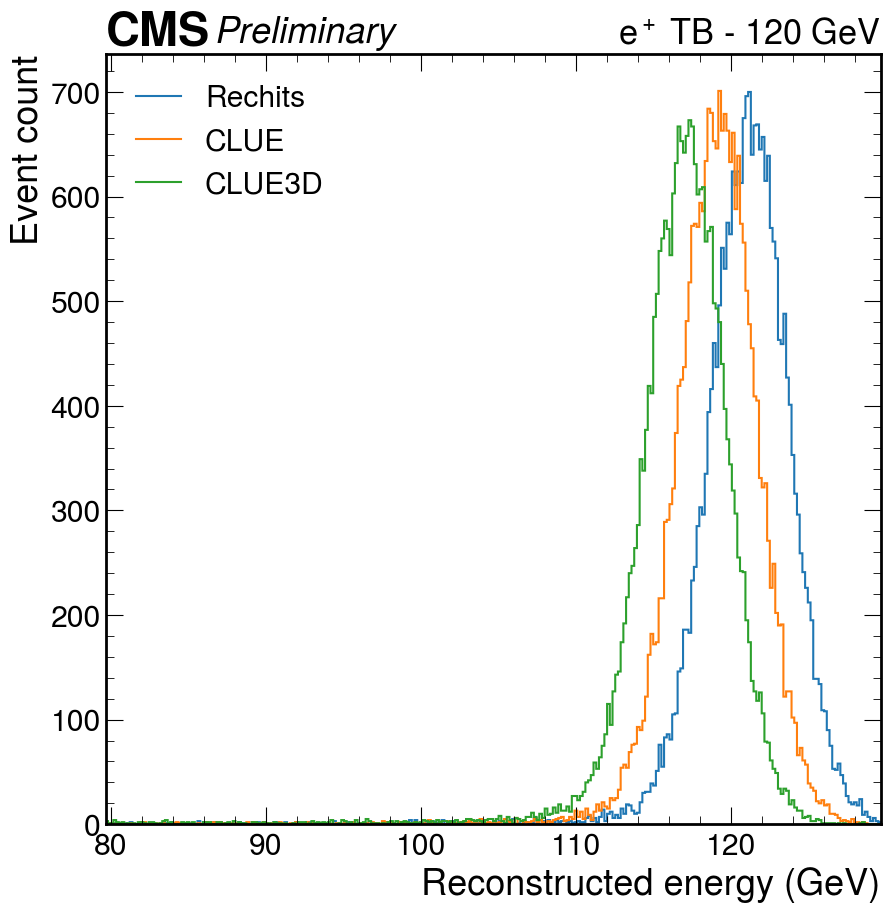

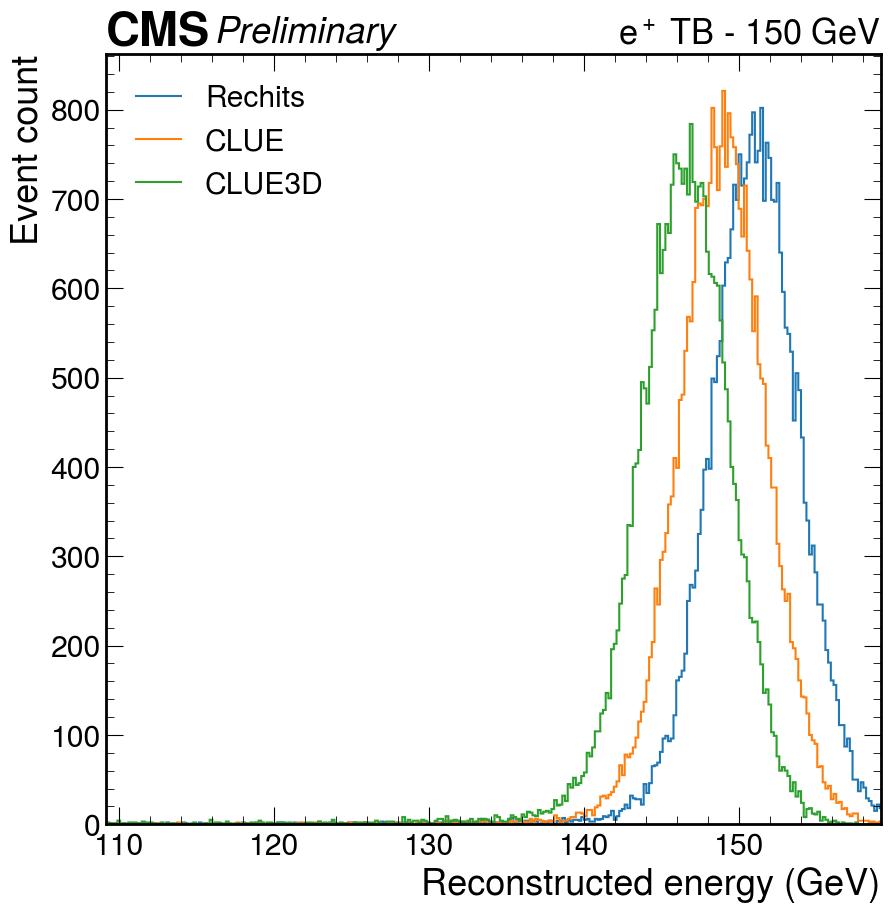

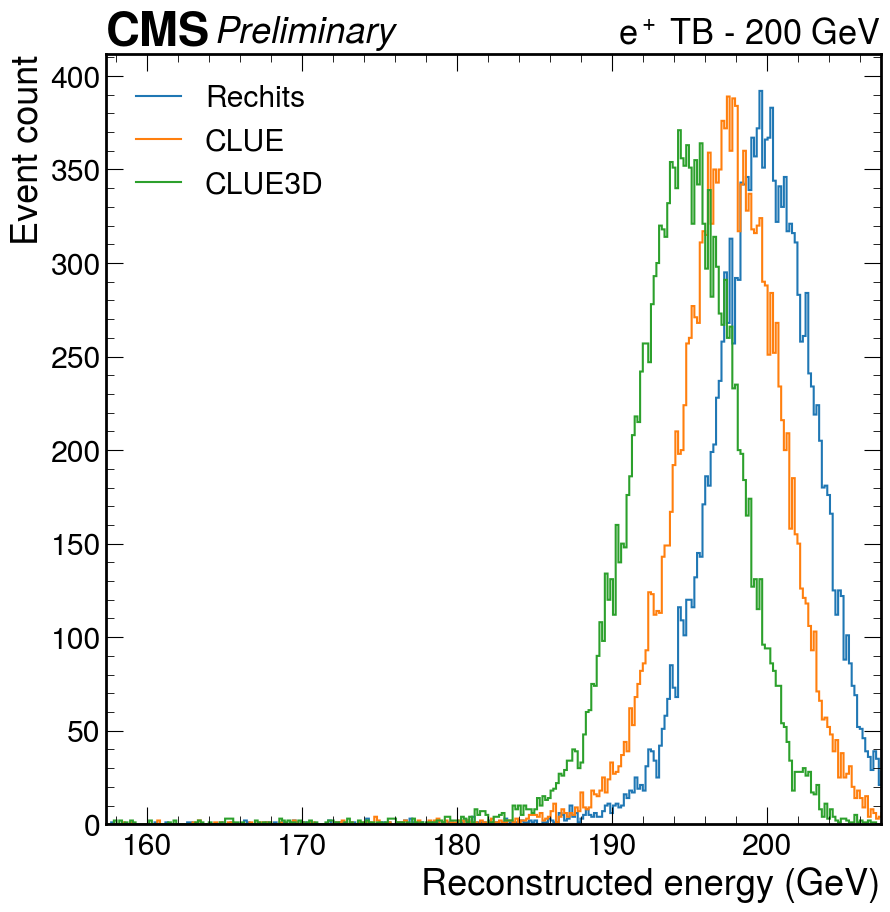

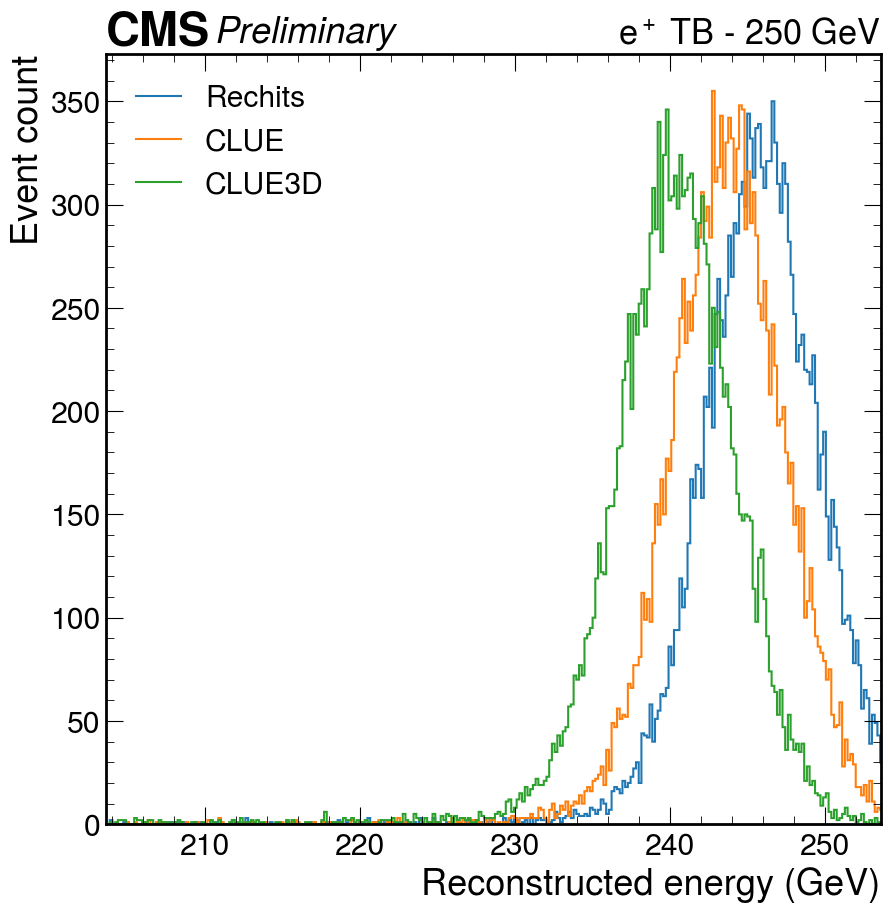

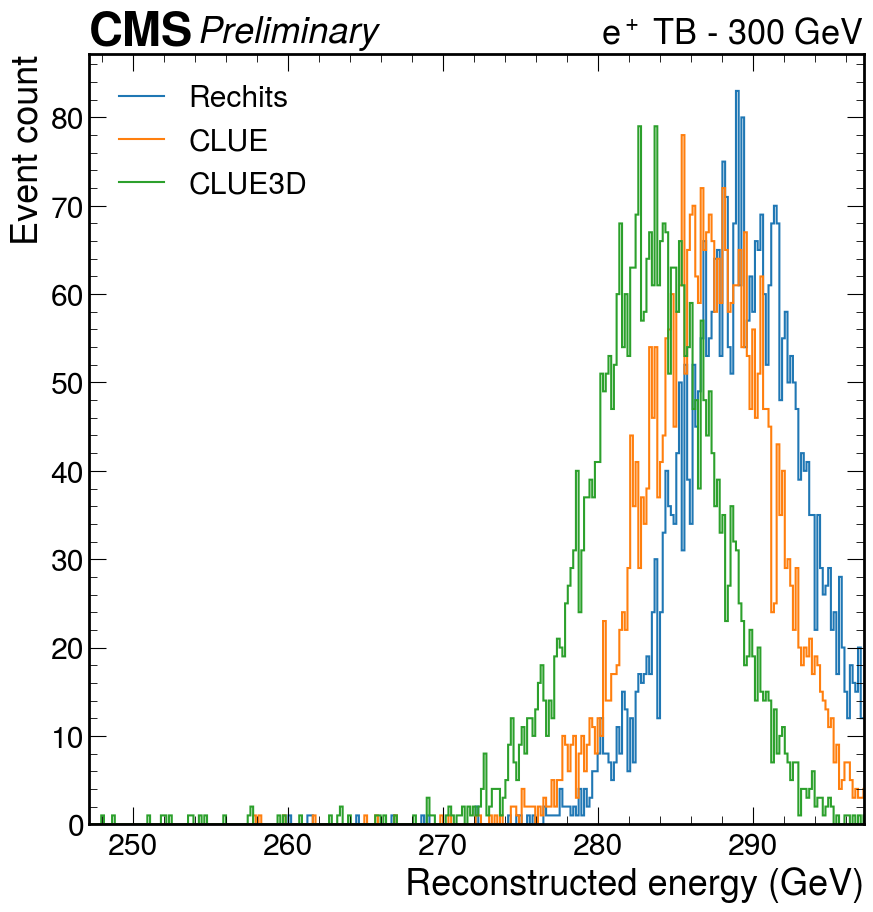

In [102]:
for beamEnergy in beamEnergies:
    plot("data", beamEnergy)

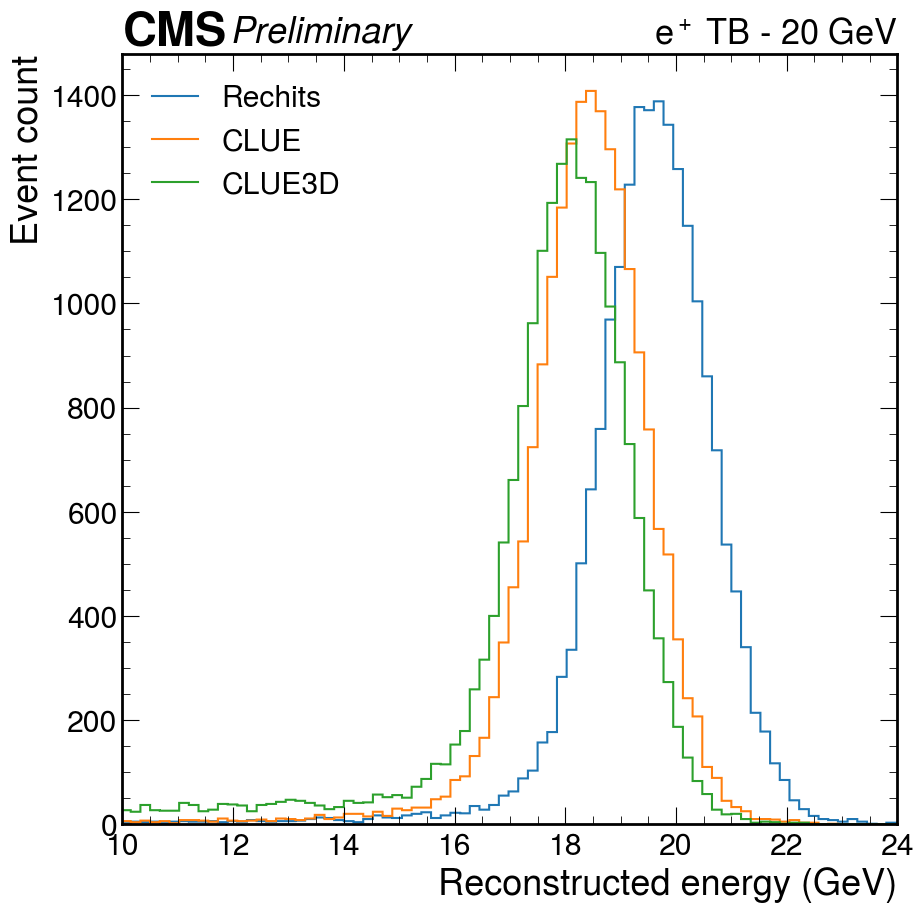

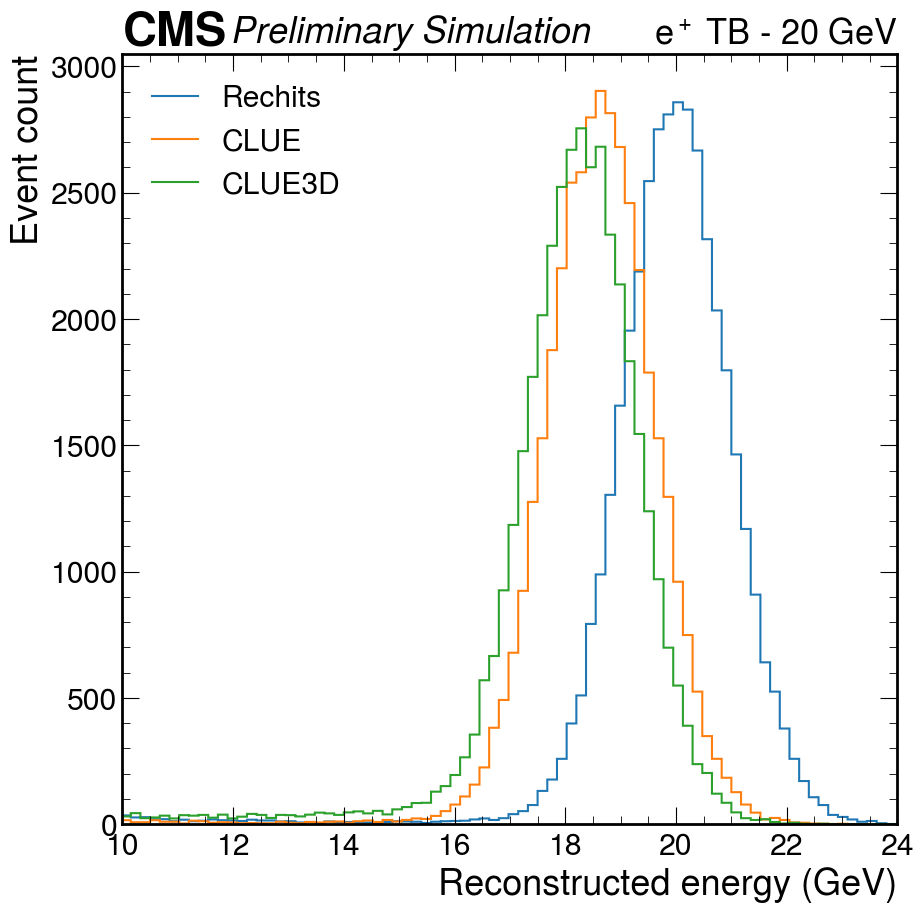

In [103]:
plot("data", 20, (10, 24))
plot("sim_proton_v46_patchMIP", 20, (10, 24))

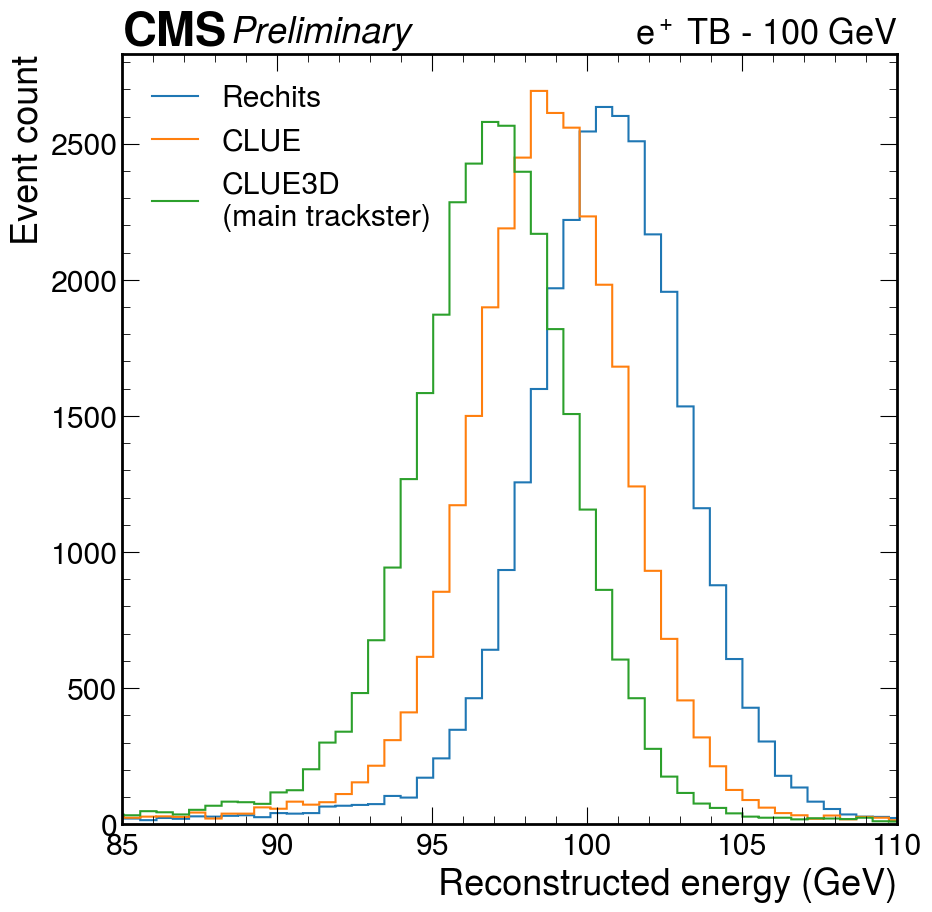

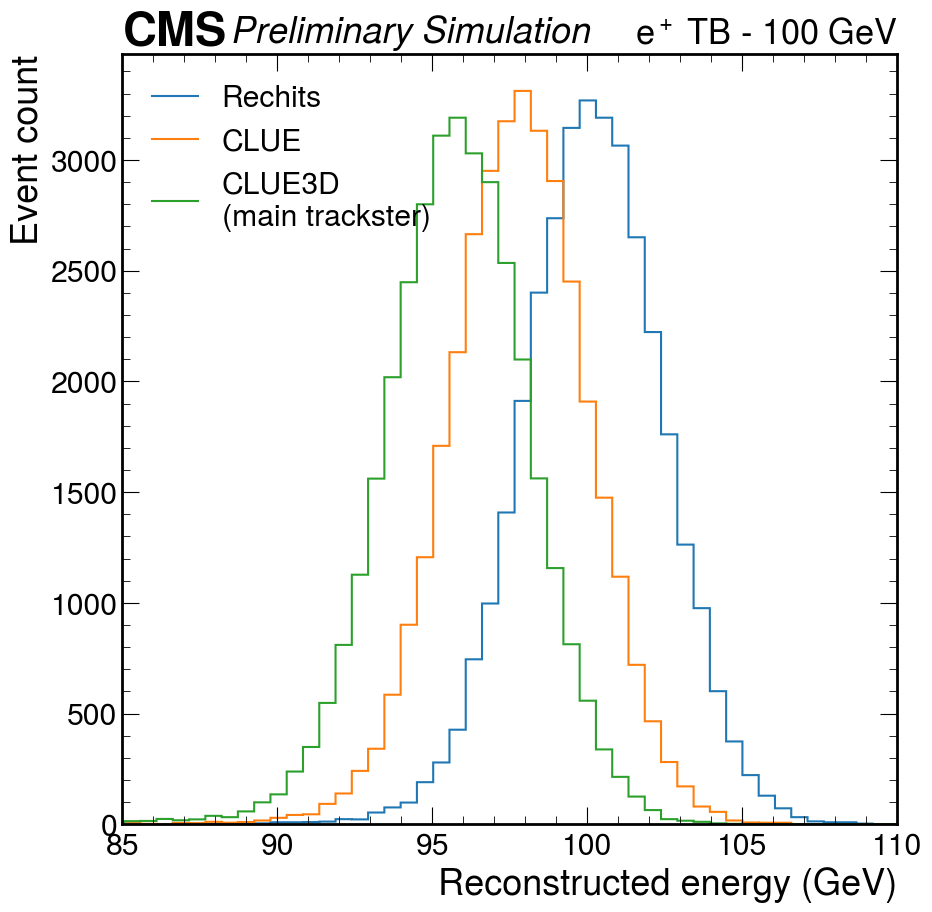

In [129]:
plot("data", 100, (85, 110), rebin=3, mainTrackster=True)
plt.savefig("plots/rechits-clue3d-energy/data-100.pdf", bbox_inches="tight")
plot("sim_proton_v46_patchMIP", 100, (85, 110), rebin=3, mainTrackster=True)
plt.savefig("plots/rechits-clue3d-energy/sim-100.pdf", bbox_inches="tight")

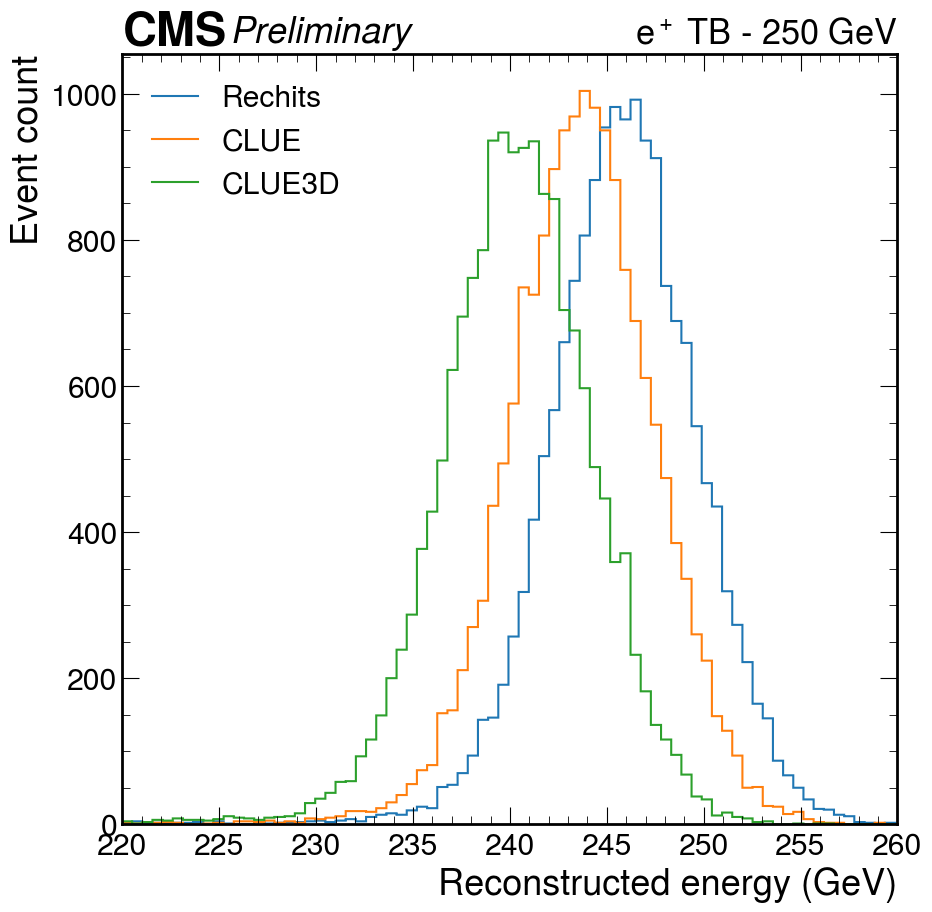

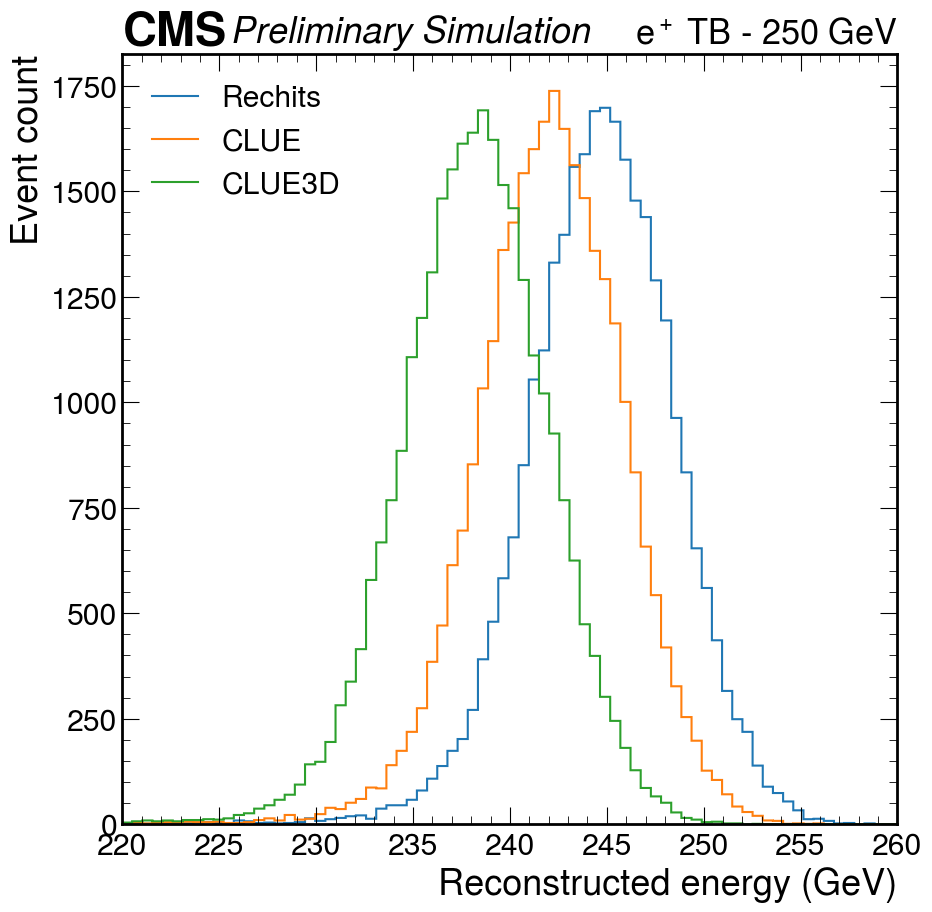

In [105]:
plot("data", 250, (220, 260), rebin=3)
plot("sim_proton_v46_patchMIP", 250, (220, 260), rebin=3)